In [34]:
# Import data
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot
bondData=pd.read_csv('bond_raw2.csv')
bondData

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price
0,1,1,128.59600,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201
1,2,1,126.67300,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528
2,3,1,126.88000,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433
3,4,1,126.36200,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765
4,5,1,124.91800,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081
5,6,1,128.89100,1.479307,5.95,25.981429,0,35.982,29000,4,126.636079
6,7,1,126.06100,10.155838,5.95,25.962051,0,12.601,220000,3,126.180334
7,8,1,124.75700,7.567823,5.95,25.951291,0,0.631,1000000,3,124.721953
8,9,1,125.10100,0.469131,5.95,25.951249,0,2.091,400000,3,124.717608
9,10,1,126.26800,7.616851,5.95,25.940349,0,12.540,150000,3,126.017363


In [35]:
bondData0=bondData.drop(['id', 'bond_id'], axis=1)
bondData0.head()

,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price
0,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201
1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528
2,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433
3,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765
4,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081


# Normalize data

In [36]:
# prepare data for normalization
from sklearn.preprocessing import MinMaxScaler
values = bondData0.values
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
scaled = scaler.transform(values)
## inverse transform 
#inversed = scaler.inverse_transform(scaled)

In [37]:
#Normalize only target
values_y = bondData0.values[:,0]
valuesY=values_y.reshape(-1, 1)
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler(feature_range=(0, 1))
scalerY = scalerY.fit(valuesY)
scaledY = scalerY.transform(valuesY)

Separate Target from Predictors

In [38]:
print(scaled.shape)
scaled0=scaled[:,0] #target variable trade_price
print(scaled0.shape)
scaled1= scaled[:,1:9] #predicting variables
print(scaled1.shape)

(10000, 9)
(10000,)
(10000, 8)


Split data

In [39]:
## Split data
#size_train=201
size_train=7965
size_test=2025
#x_train=x_features[:size_train-1]
#y_train=y_features[:size_train-1]
x_train=scaled1[:size_train-1]
print(x_train.shape)
y_train=scaled0[:size_train-1]
print(y_train.shape)
x_test=scaled1[size_train:size_train+size_test-1]
y_test=scaled0[size_train:size_train+size_test-1]
print(y_test.shape)

(7964, 8)
(7964,)
(2024,)


# The algorithms

In [40]:
n_windows = 22 
n_input =  8
n_output = 1

def create_batches(x_train,y_train, windows, input, output):
    ## Create X batch
    X_batches = x_train.reshape(-1, windows, input)  # Reshape the data
     ## Create y batch
    y_batches = y_train.reshape(-1, windows, output)
    return X_batches, y_batches

In [41]:
X_batches, y_batches = create_batches(x_train,y_train, windows =n_windows,input = n_input, output = n_output)
print(X_batches.shape, y_batches.shape)

(362, 22, 8) (362, 22, 1)


In [42]:
X_test, y_test = create_batches(x_test,y_test, windows =n_windows,input = n_input, output = n_output)
print(X_batches.shape, y_batches.shape)

(362, 22, 8) (362, 22, 1)


##  RNN

In [43]:
import tensorflow as tf
tf.reset_default_graph()
r_neuron = 120    

## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

## 2. create the model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)              

stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])   

## 3. Loss + optimization
learning_rate = 0.001  
 
loss = tf.reduce_sum(tf.square(outputs - y))    
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                          

init = tf.global_variables_initializer() 

In [44]:
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "\tMSE:", mse)
    
    y_pred1 = sess.run(outputs, feed_dict={X: X_test}) #y_test_pred
    y_train_pred1 = sess.run(outputs,feed_dict={X: X_batches})

0 	MSE: 3332.85
150 	MSE: 6.90493
300 	MSE: 3.37777
450 	MSE: 2.59619
600 	MSE: 2.32642
750 	MSE: 2.16009
900 	MSE: 2.03477
1050 	MSE: 1.93943
1200 	MSE: 1.87333
1350 	MSE: 1.81521


PLOTS

In [45]:
y_pred1.shape

(92, 22, 1)

In [46]:
y_train_pred1.shape

(362, 22, 1)

In [47]:
y_pred1=y_pred1.reshape(y_pred1.shape[0]*y_pred1.shape[1],1)
y_train_pred1=y_train_pred1.reshape(y_train_pred1.shape[0]*y_train_pred1.shape[1],1)
y_test=y_test.reshape(y_test.shape[0]*y_test.shape[1],1)

In [48]:
y_train.shape
y_pred1.shape
y_test.shape

(2024, 1)

# Invert Normalization

In [49]:
y_pred1_a=scalerY.inverse_transform(y_pred1)
y_train_pred1_a=scalerY.inverse_transform(y_train_pred1)
y_test_a=scalerY.inverse_transform(y_test)
y_trainn=y_train.reshape(-1,1)
y_train_a=scalerY.inverse_transform(y_trainn)
y_train_pred1.shape

(7964, 1)

# PLOT

In [50]:
import numpy as np
aa1=np.arange(0,y_train.shape[0])
#aa1.shape
bb1=np.arange(y_train.shape[0],y_train.shape[0]+y_test.shape[0])
#bb1.shape


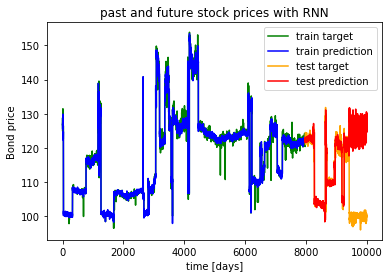

In [51]:
plt.plot(aa1, y_train_a,color = 'green', label='train target')
plt.plot(aa1, y_train_pred1_a,color = 'blue', label='train prediction')
plt.plot(bb1, y_test_a, color = 'orange', label='test target')
plt.plot(bb1, y_pred1_a, color = 'red', label='test prediction')
plt.title('past and future stock prices with RNN')
plt.xlabel('time [days]')
#plt.ylabel('normalized bond price')
plt.ylabel('Bond price')
plt.legend(loc='best');

plt.show()

##  LSTM

In [52]:
import tensorflow as tf
tf.reset_default_graph()
r_neuron = 120    

## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

## 2. create the model
basic_cell = tf.contrib.rnn.BasicLSTMCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)              

stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])   

## 3. Loss + optimization
learning_rate = 0.001  
 
loss = tf.reduce_sum(tf.square(outputs - y))    
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                          

init = tf.global_variables_initializer() 

In [53]:
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "\tMSE:", mse)
    
    y_pred2 = sess.run(outputs, feed_dict={X: X_test}) #y_test_pred
    y_train_pred2 = sess.run(outputs,feed_dict={X: X_batches})

0 	MSE: 1539.12
150 	MSE: 25.9078
300 	MSE: 7.69739
450 	MSE: 3.51009
600 	MSE: 2.68966
750 	MSE: 2.32723
900 	MSE: 2.09077
1050 	MSE: 1.98533
1200 	MSE: 1.77407
1350 	MSE: 1.67902


In [54]:
y_pred2=y_pred2.reshape(y_pred2.shape[0]*y_pred2.shape[1],1)
y_train_pred2=y_train_pred2.reshape(y_train_pred2.shape[0]*y_train_pred2.shape[1],1)


# Invert Normalization

In [55]:
y_pred2_a=scalerY.inverse_transform(y_pred2)
y_train_pred2_a=scalerY.inverse_transform(y_train_pred2)
#y_test_a=scalerY.inverse_transform(y_test)
#y_trainn=y_train.reshape(-1,1)
#y_train_a=scalerY.inverse_transform(y_trainn)
#y_train_pred1.shape

# PLOT

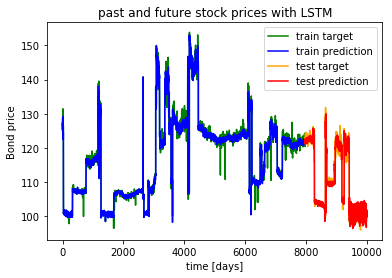

In [56]:
plt.plot(aa1, y_train_a,color = 'green', label='train target')
plt.plot(aa1, y_train_pred2_a,color = 'blue', label='train prediction')
plt.plot(bb1, y_test_a, color = 'orange', label='test target')
plt.plot(bb1, y_pred2_a, color = 'red', label='test prediction')
plt.title('past and future stock prices with LSTM')
plt.xlabel('time [days]')
#plt.ylabel('normalized bond price')
plt.ylabel('Bond price')
plt.legend(loc='best');

plt.show()

##  GRU

In [57]:
import tensorflow as tf
tf.reset_default_graph()
r_neuron = 120    

## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

## 2. create the model
basic_cell = tf.contrib.rnn.GRUCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)              

stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])   

## 3. Loss + optimization
learning_rate = 0.001  
 
loss = tf.reduce_sum(tf.square(outputs - y))    
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                          

init = tf.global_variables_initializer() 

In [58]:
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "\tMSE:", mse)
    
    y_pred3 = sess.run(outputs, feed_dict={X: X_test}) #y_test_pred
    y_train_pred3 = sess.run(outputs,feed_dict={X: X_batches})

0 	MSE: 934.804
150 	MSE: 9.6181
300 	MSE: 3.26236
450 	MSE: 2.31807
600 	MSE: 1.96879
750 	MSE: 1.97123
900 	MSE: 1.86188
1050 	MSE: 1.6229
1200 	MSE: 1.78726
1350 	MSE: 1.51872


In [59]:
y_pred3=y_pred3.reshape(y_pred3.shape[0]*y_pred3.shape[1],1)
y_train_pred3=y_train_pred3.reshape(y_train_pred3.shape[0]*y_train_pred3.shape[1],1)

# Invert Normalization

In [60]:
y_pred3_a=scalerY.inverse_transform(y_pred3)
y_train_pred3_a=scalerY.inverse_transform(y_train_pred3)
#y_test_a=scalerY.inverse_transform(y_test)
#y_trainn=y_train.reshape(-1,1)
#y_train_a=scalerY.inverse_transform(y_trainn)
#y_train_pred1.shape

# PLOT

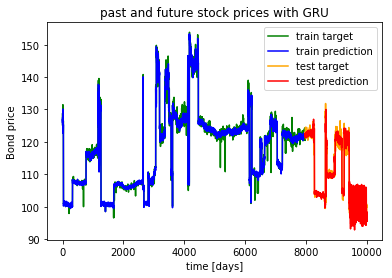

In [61]:
plt.plot(aa1, y_train_a,color = 'green', label='train target')
plt.plot(aa1, y_train_pred3_a,color = 'blue', label='train prediction')
plt.plot(bb1, y_test_a, color = 'orange', label='test target')
plt.plot(bb1, y_pred3_a, color = 'red', label='test prediction')
plt.title('past and future stock prices with GRU')
plt.xlabel('time [days]')
#plt.ylabel('normalized bond price')
plt.ylabel('Bond price')
plt.legend(loc='best');

plt.show()